In [95]:
# fix RuntimeError: Invalid DISPLAY variable
# refs : https://github.com/jupyter/docker-stacks/issues/58
%matplotlib inline

In [96]:
# refs : http://deparkes.co.uk/2015/03/11/how-to-plot-polygons-in-python/
from matplotlib import pyplot as plt

def plotPoly(poly, lng, lat):
    x,y = poly.exterior.xy
    fig = plt.figure(1, figsize=(5,5), dpi=90)
    ax = fig.add_subplot(111)
    ax.plot(x, y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    plt.plot([lng], [lat], 'ro')
    ax.set_title('Polygon')

In [97]:
from functools import partial
from shapely.geometry import Point
import pyproj
import shapely.ops
def distanceFrom(bs_lng, bs_lat):
    
    project = partial(
        pyproj.transform,
        pyproj.Proj(init='epsg:4258'),
        pyproj.Proj(init='epsg:25830')
    )
    project_inv = partial(
        pyproj.transform,
        pyproj.Proj(init='epsg:25830'),
        pyproj.Proj(init='epsg:4326')
    )
    
    bs_25830 = shapely.ops.transform(project, Point(bs_lng, bs_lat))
    bs_poly_25830 = bs_25830.buffer(800) # meters
    bs_poly = shapely.ops.transform(project_inv, bs_poly_25830)
    return bs_poly

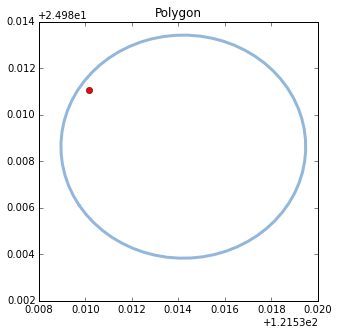

In [98]:
bs_lat = 24.98863
bs_lng = 121.54422
bus_lat = 24.991072
bus_lng = 121.540146

poly = distanceFrom(bs_lng, bs_lat)
plotPoly(poly, bus_lng, bus_lat)

In [99]:
import folium
basemap = r'http://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png'
tpi_map = folium.Map(location=[bs_lat, bs_lng], zoom_start=15, tiles=basemap, attr='OpenStreetMap')
buffer_coords = [ [lat,lon] for lon,lat in poly.boundary.coords]
tpi_map.line(locations= buffer_coords)
folium.Marker([bus_lat, bus_lng]).add_to(tpi_map)
tpi_map

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:5: FutureWarning: line is deprecated. Use add_children(PolyLine) instead
